In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import pickle
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import *
# import umap
import os
from sknetwork.clustering import Louvain,get_modularity
import sys 
sys.path.append(os.getcwd()+'/../scripts/') 
from UMAP_utils import *
sys.path.append('C:/Users/Nishant Joshi/Model_fitting/GIFFittingToolbox/src/examples/')
from Cluster_stability import *

In [2]:
savepath = 'D:/Data For Publication/figures/FN_SH/'

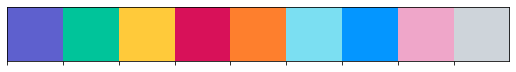

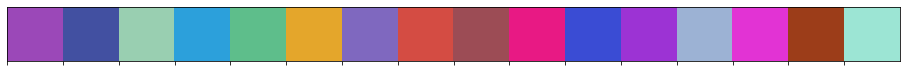

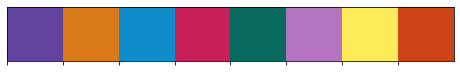

In [3]:
pal = ["#00202e","#003f5c","#2c4875","#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380"]
CUSTOM_PAL_SORT_3 = ['#5e60ce','#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da']
GMM_PAL = ['#d62424','#12db41','#f0c905','#248cd6']

SH = ['#62449E', '#D87A19','#0F8DCA','#C81F58','#086A5E','#B474BF','#FDEC57','#CE4419']
# In RGB form
coherence_colors = [[0.609, 0.283, 0.724],
                    [0.259,	0.314, 0.635],
                    [0.6,	0.812, 0.698],
                    [0.176,	0.631, 0.859],
                    [0.369,	0.749, 0.549],
                    [0.898,	0.654, 0.169],
                    [0.5,	0.41 , 0.75],
                    [0.834,	0.3 , 0.265],
                    [0.612,	0.3 , 0.334],
                    [0.912,	0.1 , 0.52],
                    [0.23,	0.3 , 0.834],
                    [0.612,	0.2 , 0.834],
                    [0.612,	0.7 , 0.834],
                    [0.89,	0.2 , 0.834],
                    [0.612,	0.24 , 0.1],
                    [0.612,	0.9 , 0.834]]
sns.palplot(CUSTOM_PAL_SORT_3)
sns.palplot(coherence_colors)
sns.palplot(SH)


## Combine data from NC dataset and common dataset

In [4]:
prob_exps = ['payam_31019_E5',
             'xuan_9519_E3',
             'xuan_9919_E3',
             'payam_101019_E4']

In [5]:
FN_combined = pd.read_pickle('D:/Data For Publication/combined_FN_acsf.pkl')
FN_combined = FN_combined[~FN_combined.exp_name.isin(prob_exps)]
SH_combined = pd.read_pickle('D:/Data For Publication/combined_CC_acsf.pkl')
SH_combined = SH_combined[~SH_combined.exp_name.isin(prob_exps)]

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


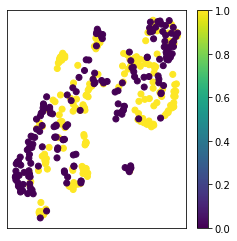

In [12]:
scaler = StandardScaler()
cols = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'max_isi', 'min_isi', 'median_isi',
       'first_thr', 'mean_thr', 'max_thr', 'min_thr', 'median_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude','max_amplitude', 'min_amplitude',]

fn_numpy = normalize(np.vstack(FN_combined['waveform'].to_numpy()),axis=0)
sh_numpy = normalize(np.vstack(SH_combined['waveforms'].to_numpy()),axis=0)

all = np.vstack([fn_numpy,sh_numpy]) 

plot_UMAP_values(all,np.hstack([np.ones(len(fn_numpy)),np.zeros(len(sh_numpy))]),random_state=42)


In [13]:
waves_FN = normalize(np.vstack(FN_combined['waveform']))



0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0


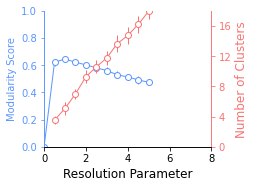

In [14]:
find_optimum_res(waves_FN,save=True,savepath='D:/Data For Publication/figures/FN_SH/waves_cluster_FN_stability.pdf' )

In [15]:
savepath = 'D:/Data For Publication/figures/FN_SH/'

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


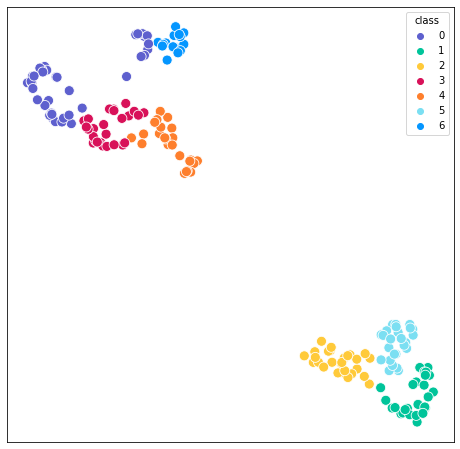

In [16]:

labels_wave_FN,mapper_FN,reducer_FN = plot_UMAP_clusters_single(waves_FN,
                                                                20,
                                                                0.1,
                                                                random_state =42,
                                                                res_louvain = 1.,
                                                                c_list =CUSTOM_PAL_SORT_3,
                                                                size=100,
                                                                norm=False,
                                                                save=True,
                                                                savepath = savepath+'waves_cluster_FN.pdf'
                                                                )


0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0


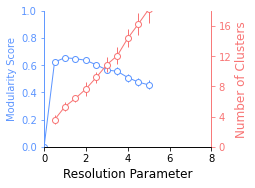

In [17]:
waves_SH = normalize(np.vstack(SH_combined['waveforms']))
find_optimum_res(waves_SH,save=True,savepath='D:/Data For Publication/figures/FN_SH/waves_cluster_SH_stability.pdf' )


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


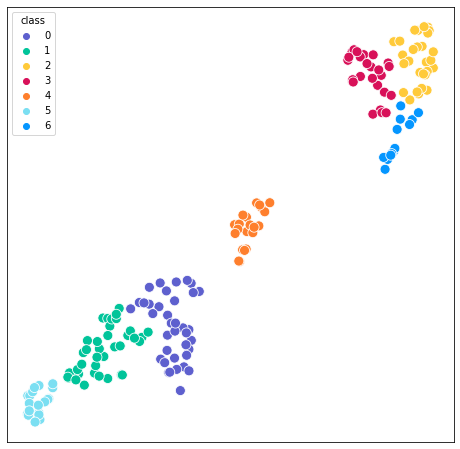

In [18]:

labels_wave_SH,mapper_SH,reducer_SH = plot_UMAP_clusters_single(waves_SH,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          size = 100,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False,
                          save=True,
                          savepath = savepath+'SH_waves_cluster.pdf'
                          )

0 38


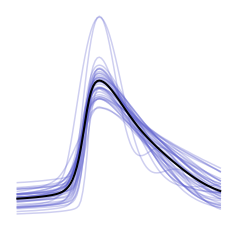

1 38


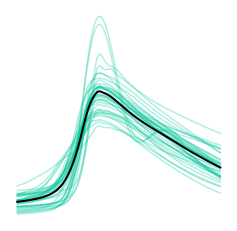

2 30


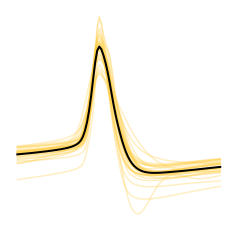

3 26


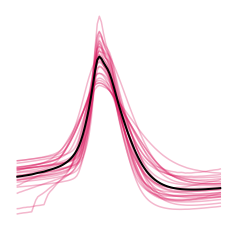

4 21


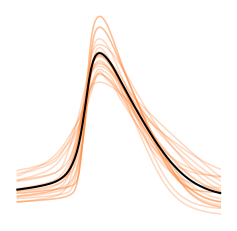

5 19


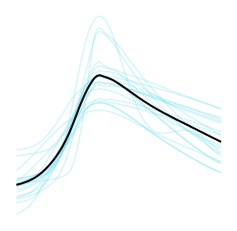

6 14


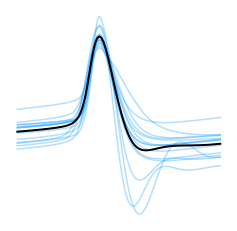

In [19]:
SH_combined['waveform_labels_SH'] = labels_wave_SH
savefolder = 'D:/Data For Publication/figures/FN_SH/'
mean_waveform_SH = []
for i in set(SH_combined['waveform_labels_SH']):

    fig,ax = plt.subplots(figsize=[4,4])
    fig.patch.set_visible(False)
    ax.axis('off')
    wave_i = np.vstack(SH_combined[SH_combined['waveform_labels_SH']==i]['waveforms'])
    mean_waveform_SH.append(np.mean(wave_i.T,axis=1))
    print(i,len(wave_i)) 
    ax.plot(wave_i.T,c=CUSTOM_PAL_SORT_3[i],alpha=0.3)
    ax.plot(np.mean(wave_i.T,axis=1),c='black',alpha=1,linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    if os.path.exists(savefolder+'/SH_waves/'):
        plt.savefig(savefolder+'/SH_waves/wave_id'+str(i)+'.pdf')
    else:
        os.mkdir(savefolder+'/SH_waves/')
        plt.savefig(savefolder+'/SH_waves/wave_id'+str(i)+'.pdf',dpi=200)

    plt.show()

0 37


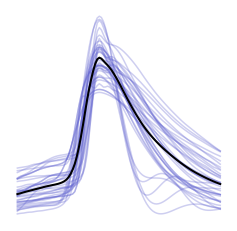

1 28


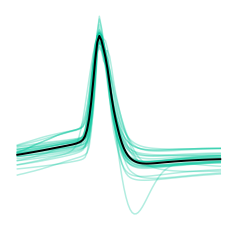

2 27


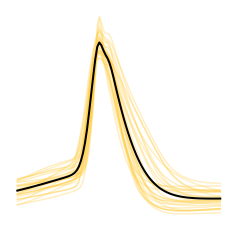

3 27


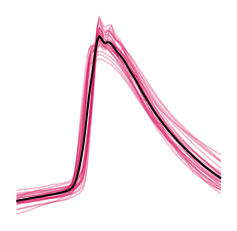

4 25


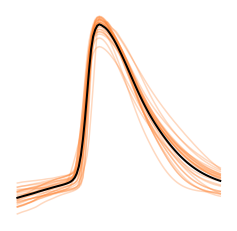

5 25


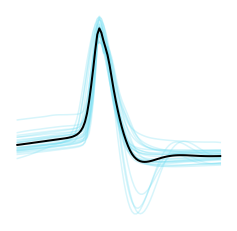

6 17


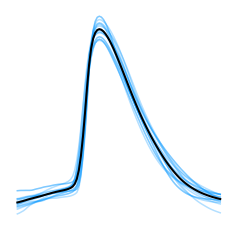

In [20]:
FN_combined['waveform_labels_FN'] = labels_wave_FN
mean_waveform_FN = []
for i in list(set(FN_combined['waveform_labels_FN'])):
    fig,ax = plt.subplots(figsize=[4,4])
    fig.patch.set_visible(False)
    ax.axis('off')
    wave_i =  np.vstack(FN_combined[FN_combined['waveform_labels_FN']==i]['waveform']) 
    print(i,len(wave_i))

    ax.plot(wave_i.T,c=CUSTOM_PAL_SORT_3[i],alpha=0.3)
    ax.plot(np.mean(wave_i.T,axis=1),c='black',alpha=1,linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    mean_waveform_FN.append(np.mean(wave_i.T,axis=1))
    if os.path.exists(savefolder+'/FN_waves/'):
        plt.savefig(savefolder+'/FN_waves/wave_id'+str(i)+'.pdf')
    else:
        os.mkdir(savefolder+'/FN_waves/')
        plt.savefig(savefolder+'/FN_waves/wave_id'+str(i)+'.pdf',dpi=200)

    plt.show()

In [21]:
from sklearn.metrics.pairwise import cosine_similarity


In [93]:
cosine_mat = np.zeros((len(set(FN_combined.waveform_labels_FN)),len(set(SH_combined.waveform_labels_SH))))
data1 = normalize(np.vstack(SH_combined['waveforms']))
data2 = normalize(np.vstack(FN_combined['waveform']))
sim_data = cosine_similarity(data1,data2)
for i in set(FN_combined.waveform_labels_FN):
    for j in set(SH_combined.waveform_labels_SH):
        idx_FN = FN_combined.waveform_labels_FN==i
        idx_SH = SH_combined.waveform_labels_SH==j
        cosine_mat[i,j] = np.mean(sim_data[:,idx_FN][idx_SH])


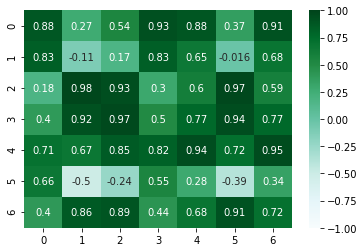

In [100]:
sns.heatmap(cosine_mat.T,cmap='BuGn',vmin=-1,vmax=1,annot=True)
plt.savefig("D:/Data For Publication/figures/FN_SH/cosine_similarity_FN_SH.pdf",dpi=200)

In [23]:

def return_confusion_matrix_(df1,df2,label1_name,label2_name,figsize =[12,5] ,vmin=0,vmax=100,shuffle = False,save=False,savepath=None,cmap='BrBG_r'):
    np.random.seed(42)
    if shuffle:
        fig,ax1 = plt.subplots(figsize =figsize )
        df = pd.DataFrame(columns=['label1','label2'])
        # df['exp_name1'] = df1.exp_name
        # df['exp_name2'] = df2.exp_name
        
        label1 = list(df1[label1_name])
        np.random.shuffle(label1)
        label2 = list(df2[label2_name])
        np.random.shuffle(label2)

        df['label1_sh'] = label1
        df['label2_sh'] = label2

        df['label1'] = np.array(df1[label1_name]) 
        df['label2'] = np.array(df2[label2_name])

        mat_orig = np.zeros((len(set(df1[label1_name])),len(set(df2[label2_name]))))
        for i in np.unique(df.label1):
            data_ = np.unique(df[df.label1==i]['label2'],return_counts=True)
            mat_orig[i,data_[0]] =(data_[1]/np.sum(data_[1]))*100 

        mat_sh = np.zeros((len(set(df['label1_sh'])),len(set(df['label2_sh']))))

        for i in np.unique(df.label1_sh):
            data_ = np.unique(df[df.label1_sh==i]['label2_sh'],return_counts=True)
            mat_sh[i,data_[0]] =(data_[1]/np.sum(data_[1]))*100 


        sns.heatmap(mat_orig-mat_sh,cmap=cmap,annot=True,ax=ax1,vmin=vmin,vmax=vmax) 
        if save:
            plt.savefig(savepath,dpi=300)
        else:
            plt.show()

    else:
        df = pd.DataFrame(columns=['label1','label2'])
        # df['exp_name1'] = df1.exp_name
        # df['exp_name2'] = df2.exp_name
        df['label1'] = np.array(df1[label1_name])
        df['label2'] = np.array(df2[label2_name])

        mat = np.zeros((len(set(df1[label1_name])),len(set(df2[label2_name]))))

        for i in np.unique(df.label1):
            data_ = np.unique(df[df.label1==i]['label2'],return_counts=True)
            mat[i,data_[0]] =(data_[1]/np.sum(data_[1]))*100 

        sns.heatmap(mat,cmap=cmap,annot=True,vmin=-60,vmax=60) 



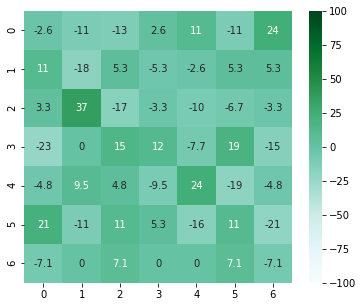

In [24]:
return_confusion_matrix_(SH_combined,FN_combined,'waveform_labels_SH','waveform_labels_FN',figsize=[6,5],vmin=-100,vmax=100,shuffle=True,save=True,cmap='BuGn',savepath ='D:/Data For Publication/figures/FN_SH/confusion_matrix_waveform_SH.pdf')

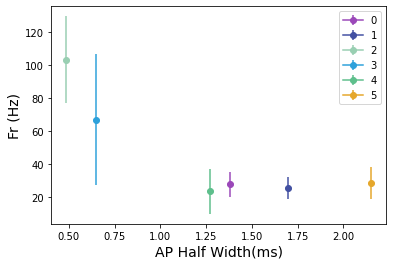

In [ ]:
frs = []
ap_width = []  
frs_std = []
ap_width_std = []

for i in set(SH_combined['waveform_labels_SH']):
    frs.append(np.mean(SH_combined[SH_combined.waveform_labels_SH==i]['fr']))
    frs_std.append(np.std(SH_combined[SH_combined.waveform_labels_SH==i]['fr']))

    ap_width.append(np.mean(SH_combined[SH_combined.waveform_labels_SH==i]['mean_width']))
    ap_width_std.append(np.std(SH_combined[SH_combined.waveform_labels_SH==i]['mean_width']))

# plt.errorbar(list(set(SH_combined['waveform_labels_SH'])),frs,yerr=frs_std,marker='o',c='black')
# # plt.hlines(4,0,8,linestyles='dashed',color='grey')
# plt.ylabel('Fr (Hz)')
# plt.xlabel('class')
# plt.show()

for i in range(len(ap_width)):
    plt.errorbar(ap_width[i],frs[i],marker='o',c=coherence_colors[i],yerr=frs_std[i],label = list(set(SH_combined['waveform_labels_SH']))[i])
    plt.ylabel('Fr (Hz)',fontsize=14)
    plt.xlabel('AP Half Width(ms)',fontsize=14)
    plt.legend()
plt.savefig(savefolder+'SH_FR_V_AP_width.pdf',dpi=300)
# plt.show()

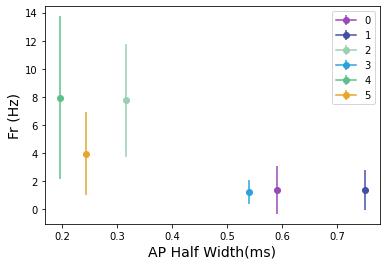

In [ ]:
frs = []
ap_width = []  
frs_std = []
ap_width_std = []

for i in set(FN_combined['waveform_labels_FN']):
    frs.append(np.mean(FN_combined[FN_combined.waveform_labels_FN==i]['fr']))
    frs_std.append(np.std(FN_combined[FN_combined.waveform_labels_FN==i]['fr']))

    ap_width.append(np.mean(FN_combined[FN_combined.waveform_labels_FN==i]['mean_width']))
    ap_width_std.append(np.std(FN_combined[FN_combined.waveform_labels_FN==i]['mean_width']))

# plt.errorbar(list(set(FN_combined['waveform_labels_FN'])),frs,yerr=frs_std,marker='o',c='black')
# # plt.hlines(4,0,8,linestyles='dashed',color='grey')
# plt.ylabel('Fr (Hz)')
# plt.xlabel('class')
# plt.show()


for i in range(len(ap_width)):
    plt.errorbar(ap_width[i],frs[i],marker='o',c=coherence_colors[i],yerr=frs_std[i],label = list(set(FN_combined['waveform_labels_FN']))[i])
    plt.ylabel('Fr (Hz)',fontsize=14)
    plt.xlabel('AP Half Width(ms)',fontsize=14)
    plt.legend()
plt.savefig(savefolder+'FN_FR_V_AP_width.pdf',dpi=300)

In [25]:
from xg_boost_classifier import  * 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 89.09471480900054


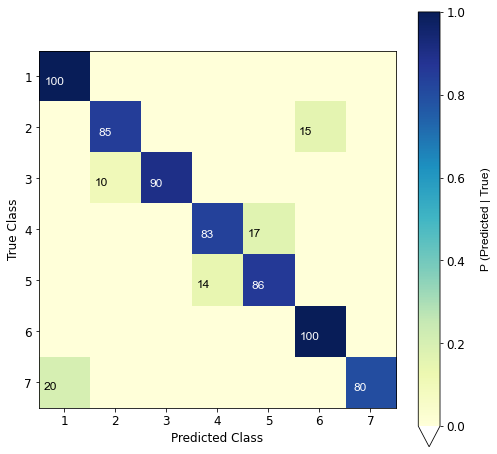

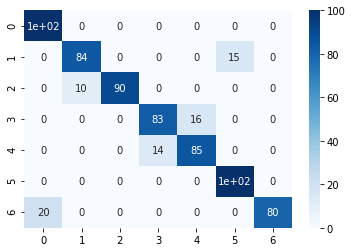

In [26]:
matrix_fn_waves = return_xg_boost_trees_classification(FN_combined['waveform'],FN_combined.waveform_labels_FN)
plt.show()
sns.heatmap(np.int32(matrix_fn_waves*100),cmap='Blues',annot=True)
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 91.94139194139193


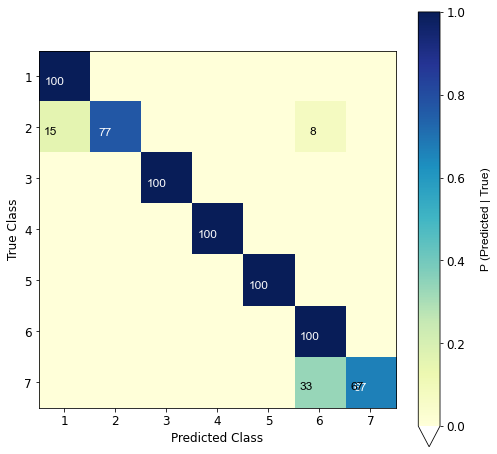

In [27]:
matrix_sh_waves = return_xg_boost_trees_classification(SH_combined['waveforms'],SH_combined.waveform_labels_SH)


0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0


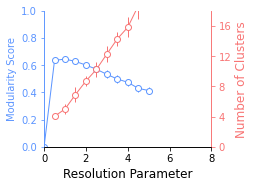

In [28]:
cols = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'max_isi', 'min_isi', 'median_isi',
       'first_thr', 'mean_thr', 'max_thr', 'min_thr', 'median_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude','max_amplitude', 'min_amplitude',]
ephys_data_sh = normalize(np.vstack(SH_combined[cols].to_numpy()),axis=0)

find_optimum_res(ephys_data_sh,save=True,savepath='D:/Data For Publication/figures/FN_SH/ephys_cluster_SH_stability.pdf')

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


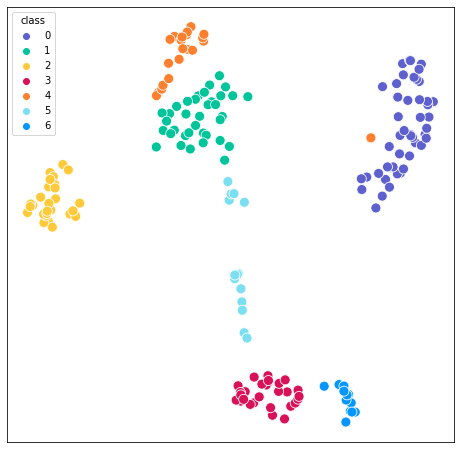

In [29]:

lables_ephys_exc,mapper,reducer = plot_UMAP_clusters_single(ephys_data_sh,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,                          
                          size = 100,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False,
                          save=False,
                          savepath = 'D:/Data For Publication/figures/FN_SH/SH_ephys_cluster.pdf')
SH_combined['labels_ephys'] = lables_ephys_exc

In [30]:
cols = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'max_isi', 'min_isi', 'median_isi',
       'first_thr', 'mean_thr', 'max_thr', 'min_thr', 'median_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude','max_amplitude', 'min_amplitude',]
ephys_data_fn = normalize(np.vstack(FN_combined[cols].to_numpy()),axis=0)




0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0


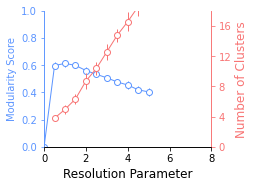

In [31]:
find_optimum_res(ephys_data_fn,save=True,savepath='D:/Data For Publication/figures/FN_SH/ephys_cluster_FN_stability.pdf')

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


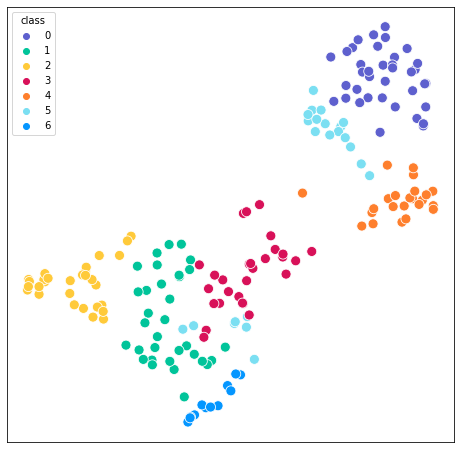

In [32]:

lables_ephys_exc,mapper,reducer = plot_UMAP_clusters_single(ephys_data_fn,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          size = 100,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False,
                          save=True,
                          savepath = savepath+'FN_ephys_cluster.pdf')
                          
FN_combined['labels_ephys'] = lables_ephys_exc

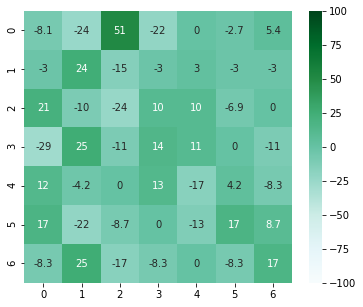

In [33]:
return_confusion_matrix_(FN_combined,SH_combined,'labels_ephys','labels_ephys',vmin=-100,vmax=100,figsize=[6,5],shuffle=True, save=False,cmap='BuGn',
                          savepath = 'D:/Data For Publication/figures/FN_SH/Confusion_matrix_FN_SH_ephys.pdf')

In [34]:
sh_mean_ephys = []
fn_mean_ephys = []
for i in set(FN_combined.labels_ephys):
    fn_mean_ephys.append(np.mean(FN_combined[FN_combined.labels_ephys==i][cols].to_numpy(),axis=0))
for i in set(SH_combined.labels_ephys):
    sh_mean_ephys.append(np.mean(SH_combined[SH_combined.labels_ephys==i][cols].to_numpy(),axis=0))    

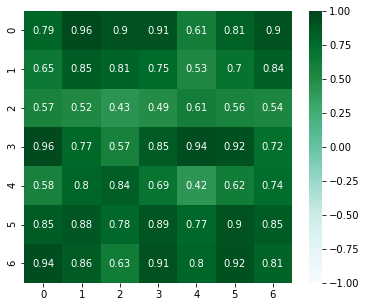

In [203]:
fig,ax = plt.subplots(figsize=[6,5])
sns.heatmap(cosine_similarity(normalize(sh_mean_ephys,axis=0),normalize(fn_mean_ephys,axis=0)),
            cmap='BuGn',
            annot=True,
            vmin=-1,
            vmax=1)
# plt.xlabel('FN ID')
# plt.ylabel('SH ID')
plt.savefig(savefolder+'/cosine_similarity_FN_SH_ephys.pdf',dpi=200)

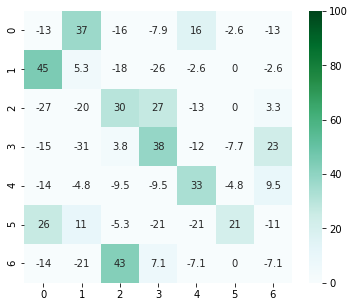

In [35]:
return_confusion_matrix_(SH_combined,SH_combined,'waveform_labels_SH','labels_ephys',figsize=[6,5],shuffle=True, save=True,cmap='BuGn',
                          savepath = 'D:/Data For Publication/figures/FN_SH/Confusion_matrix_SH_ephys_waveform.pdf')

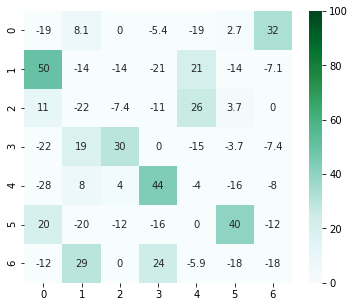

In [36]:
return_confusion_matrix_(FN_combined,FN_combined,'waveform_labels_FN','labels_ephys',figsize=[6,5],shuffle=True,save=True,cmap='BuGn',
                          savepath = 'D:/Data For Publication/figures/FN_SH/Confusion_matrix_FN_ephys_waveform.pdf')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 89.84126984126985
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 70.4090354090354


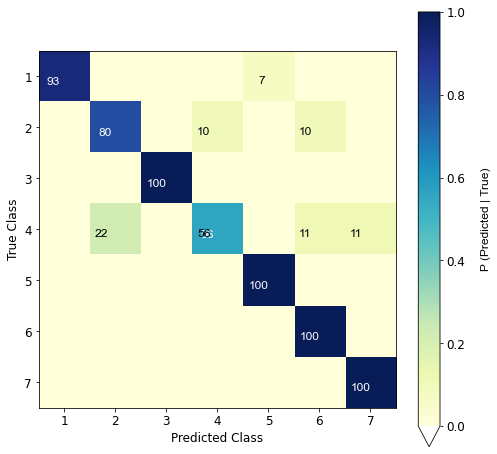

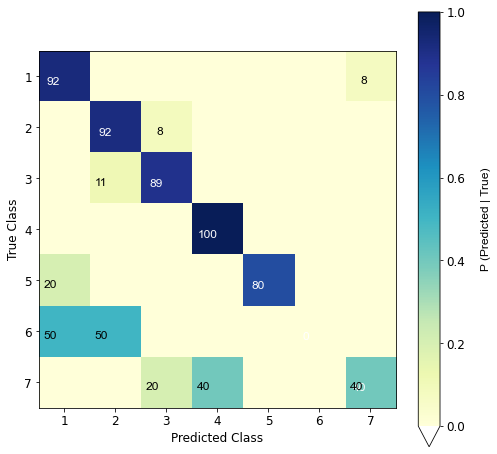

In [46]:
matrix_fn_ephys = return_xg_boost_trees_classification(FN_combined[cols].to_numpy(),FN_combined.labels_ephys)
matrix_sh_ephys = return_xg_boost_trees_classification(SH_combined[cols].to_numpy(),SH_combined.labels_ephys)

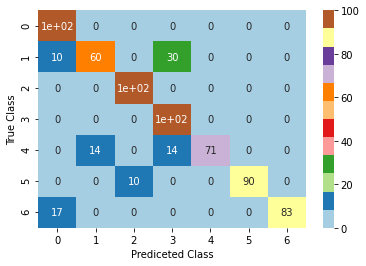

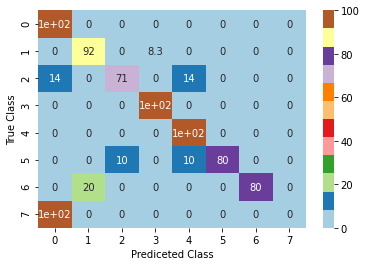

In [341]:
sns.heatmap(matrix_fn_waves*100,annot=True,cmap='Paired')
plt.xlabel('Prediceted Class')
plt.ylabel('True Class')
plt.show()

sns.heatmap(matrix_sh_waves*100,annot=True,cmap='Paired')
plt.xlabel('Prediceted Class')
plt.ylabel('True Class')
plt.show()

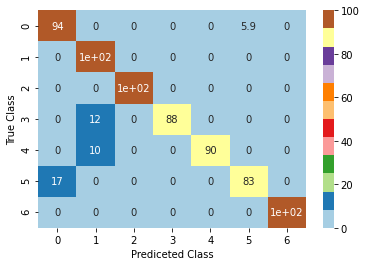

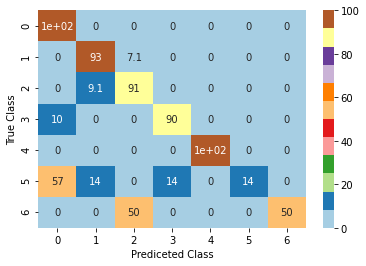

In [338]:
sns.heatmap(matrix_fn_ephys*100,annot=True,cmap='Paired')
plt.xlabel('Prediceted Class')
plt.ylabel('True Class')
plt.show()

sns.heatmap(matrix_sh_ephys*100,annot=True,cmap='Paired')
plt.xlabel('Prediceted Class')
plt.ylabel('True Class')
plt.show()

<Axes: xlabel='labels_ephys', ylabel='Count'>

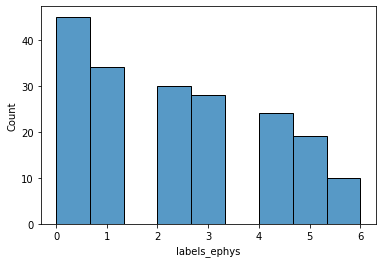

In [342]:
sns.histplot(FN_combined.labels_ephys)

In [38]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

print((adjusted_rand_score(FN_combined.labels_ephys,SH_combined.labels_ephys) ,
adjusted_mutual_info_score(FN_combined.labels_ephys,SH_combined.labels_ephys)))



(0.14922142029788482, 0.2067145570680569)


In [39]:
print((adjusted_rand_score(FN_combined.waveform_labels_FN,SH_combined.waveform_labels_SH) ,
adjusted_mutual_info_score(FN_combined.waveform_labels_FN,SH_combined.waveform_labels_SH)))



(0.08508653586750443, 0.13310361582434083)


<Axes: >

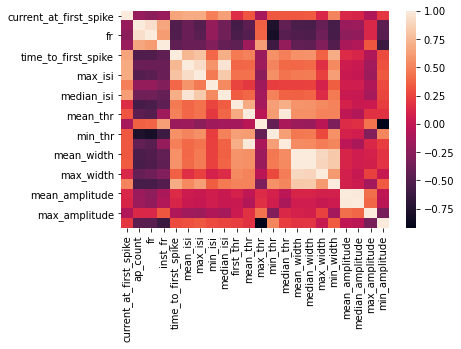

In [68]:
sns.heatmap(FN_combined[cols].corr())

In [47]:
cols_spikes   = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr','time_to_first_spike', 'mean_isi', 'median_isi', 'max_isi', 'min_isi',]
cols_thrs     = ['first_thr', 'mean_thr', 'median_thr', 'min_thr', 'max_thr',]
cols_wf       = ['mean_width', 'median_width', 'max_width', 'min_width','mean_amplitude', 'median_amplitude', 'min_amplitude', 'max_amplitude',]

In [48]:
savepath = 'D:/Data For Publication/figures/FN_SH/'

In [105]:
# from plot_utils import *


def plot_radar(data,cols,labels,figsize=(6, 6),palette=None,logscale=True,save=False,savepath=None,):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))

    cols_ = cols
    data_norm = normalize(data[cols_].to_numpy(),axis=0)
    # Data
    categories = cols_
    for i in list(set(labels)):
        idx = labels==i
        values_1 = data_norm[idx,:]

        # Number of variables we're plotting.
        num_vars = len(cols_)

        # Compute angle of each axis.
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        # The plot is a circle, so we need to "complete the loop".
        # Append the start value to the end.
        values_1 = np.insert(values_1,[values_1.shape[1]],values_1[:,:1],axis=1)
        angles += angles[:1]

        # Create the figure.

        # Draw one axe per variable and add labels.
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        plt.xticks(angles[:-1], categories,fontsize=12,)
        for label, angle in zip(ax.get_xticklabels(), angles):
            x, y = label.get_position()
            label.set_position((x, y-0.2 ))  # Adjust the value to move labels further out

        # Draw ylabels.
        if logscale:
            ax.set_rscale('log')
            ax.plot(angles, values_1.T, linewidth=1,c=palette[i], linestyle='solid',alpha=0.1 )

            ax.plot(angles, np.mean(values_1.T,axis=1), linewidth=3,c=palette[i], linestyle='solid',alpha=.8 )

        else:
            # ax.set_rscale('log')

            ax.plot(angles, values_1.T, linewidth=1,c=palette[i], linestyle='solid',alpha=0.1 )

            ax.plot(angles, np.mean(values_1.T,axis=1), linewidth=3,c=palette[i], linestyle='solid',alpha=.8 )

    if save:
        plt.savefig(savepath,dpi=200)
    else:
        plt.show()

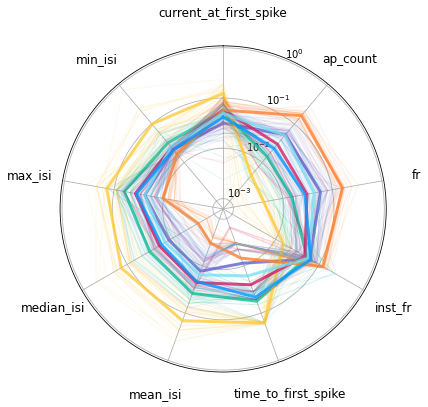

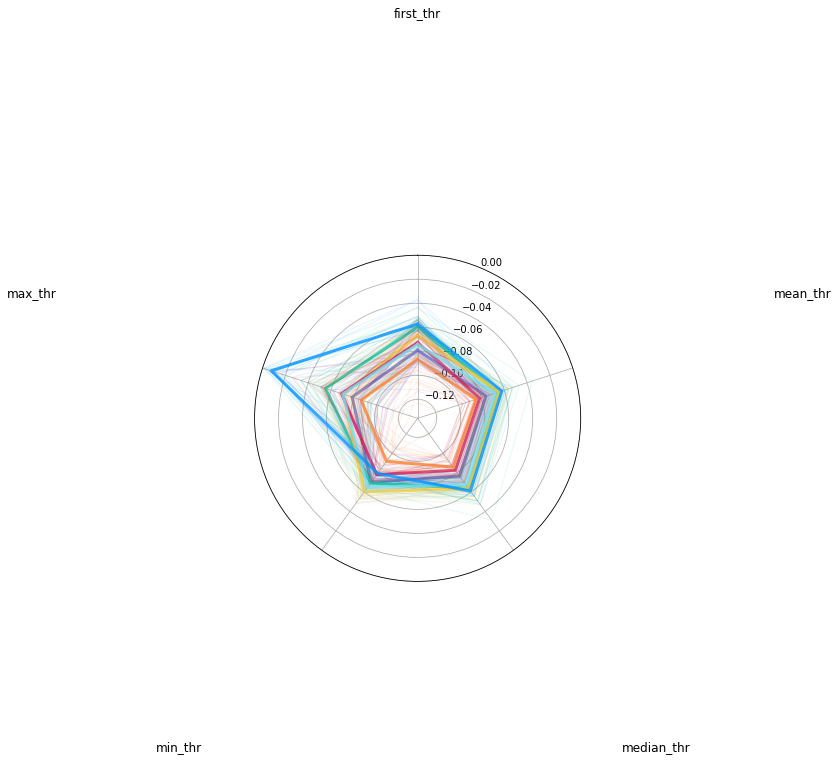

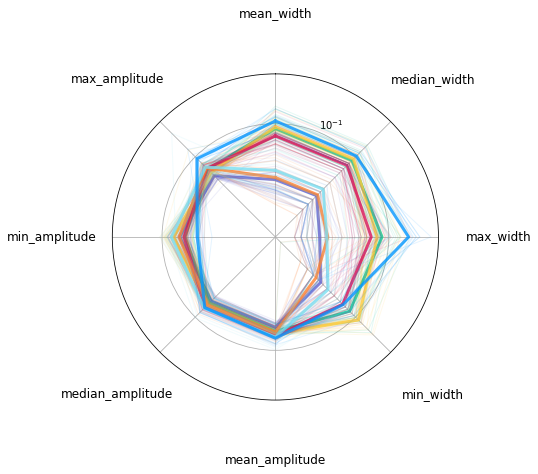

In [106]:
plot_radar(FN_combined,cols_spikes,FN_combined.labels_ephys,palette=CUSTOM_PAL_SORT_3,save=True,savepath=savepath+'FN_spikes_radar.pdf')
plot_radar(FN_combined,cols_thrs,FN_combined.labels_ephys,palette=CUSTOM_PAL_SORT_3,logscale = False,save=True,savepath=savepath+'FN_thrs_radar.pdf')
plot_radar(FN_combined,cols_wf,FN_combined.labels_ephys,palette=CUSTOM_PAL_SORT_3,save=True,savepath=savepath+'FN_wave_radar.pdf')

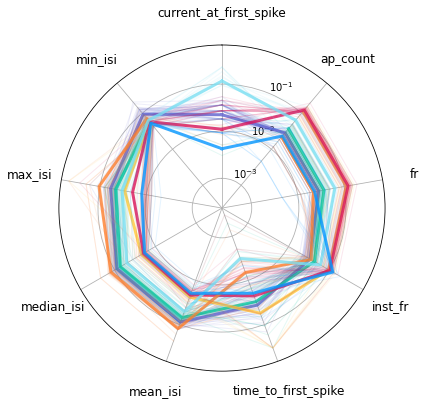

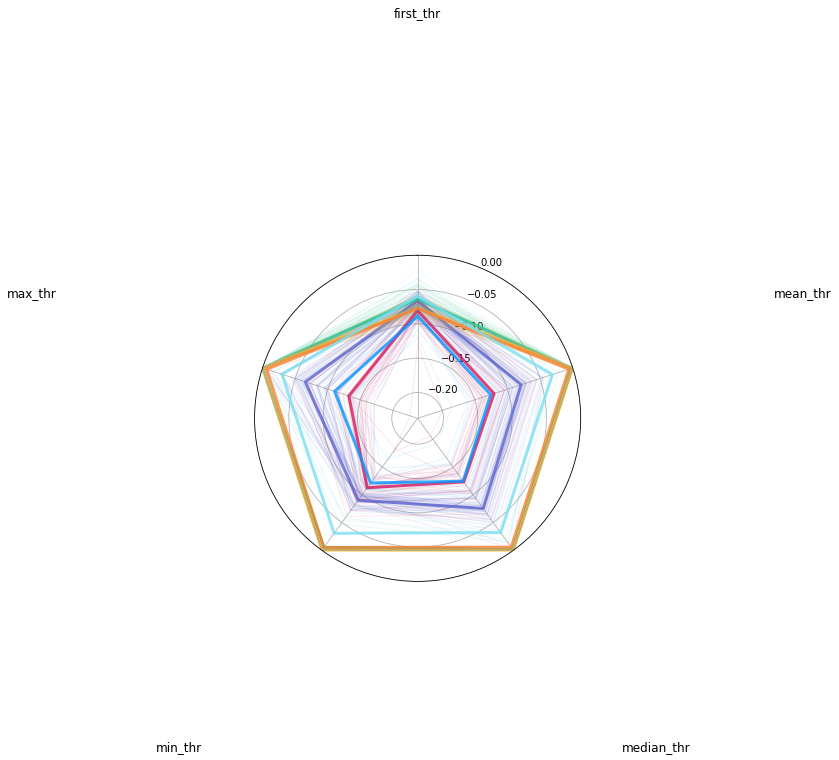

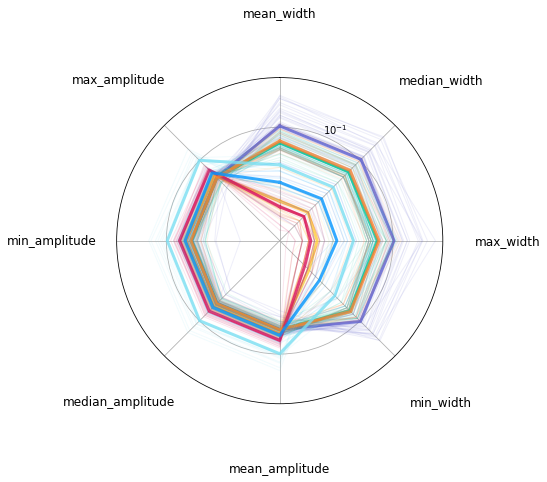

In [107]:
plot_radar(SH_combined,cols_spikes,SH_combined.labels_ephys,palette=CUSTOM_PAL_SORT_3,save=True,savepath=savepath+'SH_spikes_radar.pdf')
plot_radar(SH_combined,cols_thrs,SH_combined.labels_ephys,palette=CUSTOM_PAL_SORT_3,logscale = False,save=True,savepath=savepath+'SH_thrs_radar.pdf')
plot_radar(SH_combined,cols_wf,SH_combined.labels_ephys,palette=CUSTOM_PAL_SORT_3,save=True,savepath=savepath+'SH_wave_radar.pdf')


current_at_first_spike


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


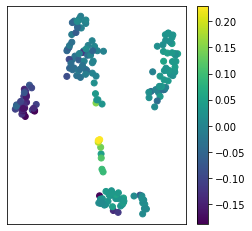

ap_count


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


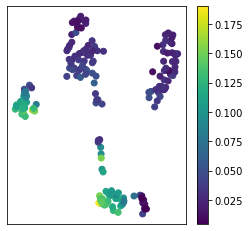

fr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


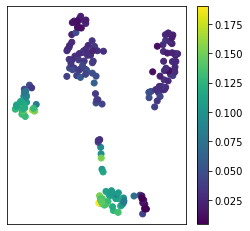

inst_fr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


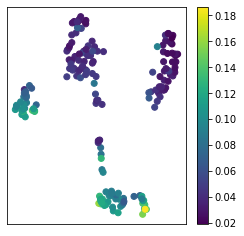

time_to_first_spike


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


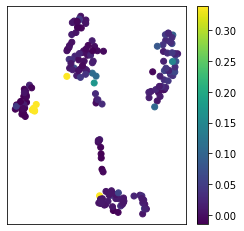

mean_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


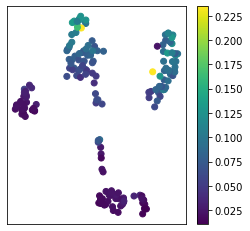

max_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


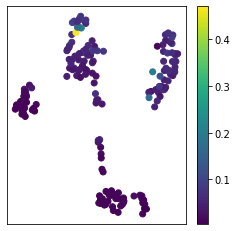

min_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


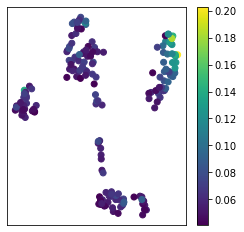

median_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


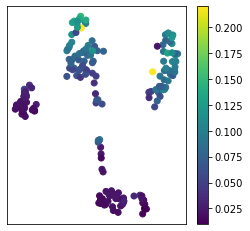

first_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


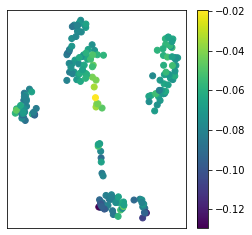

mean_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


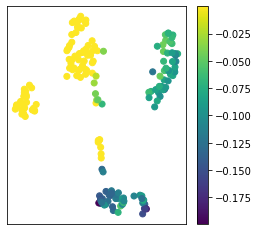

max_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


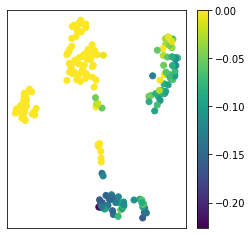

min_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


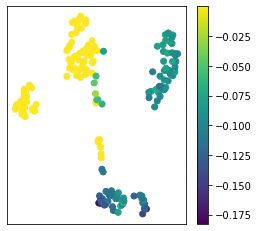

median_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


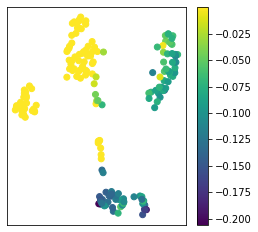

mean_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


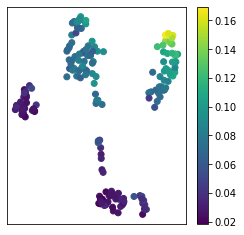

median_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


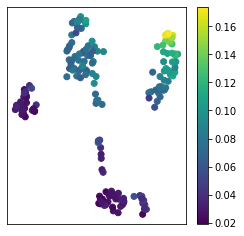

max_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


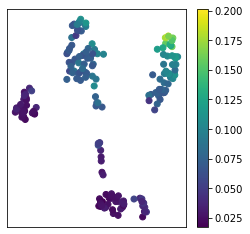

min_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


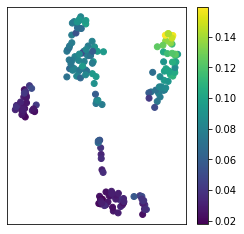

mean_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


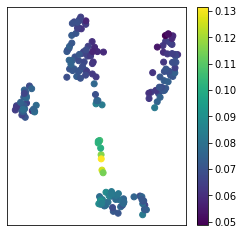

median_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


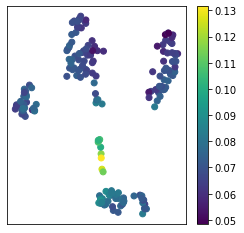

max_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


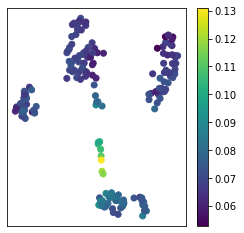

min_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


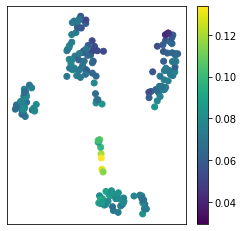

In [122]:
for i in cols:
    print(i)
    val = SH_combined[i].to_numpy().reshape(-1,1)/np.linalg.norm(SH_combined[i].to_numpy().reshape(-1,1))
    plot_UMAP_values(SH_combined[cols],val,random_state=42)
    plt.show()

current_at_first_spike


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


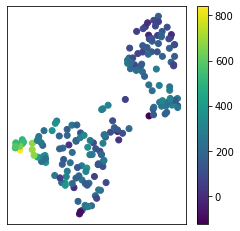

ap_count


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


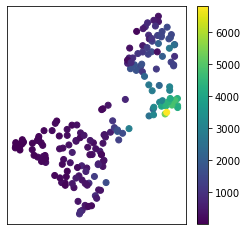

fr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


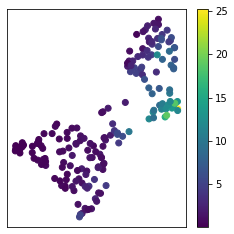

inst_fr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


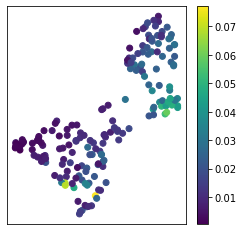

time_to_first_spike


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


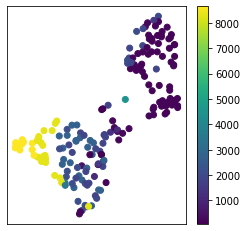

mean_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


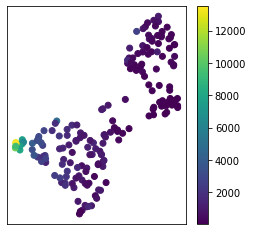

max_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


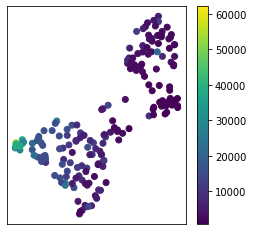

min_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


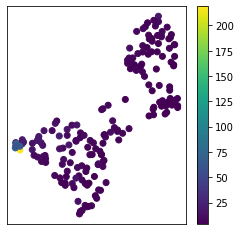

median_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


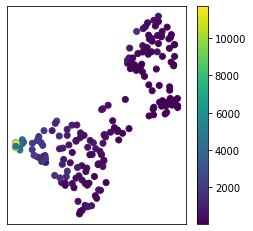

first_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


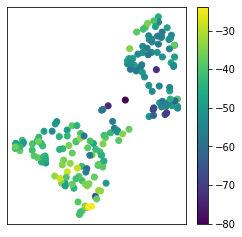

mean_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


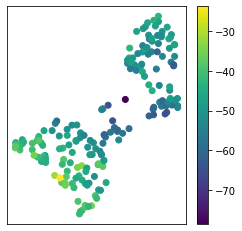

max_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


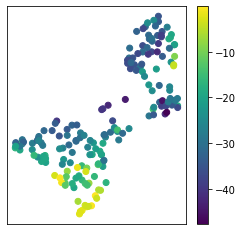

min_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


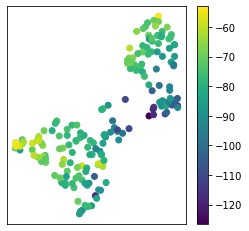

median_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


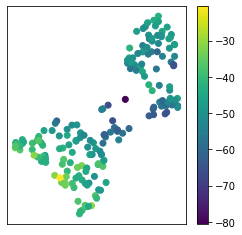

mean_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


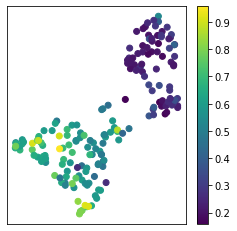

median_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


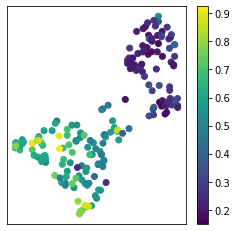

max_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


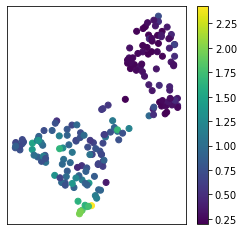

min_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


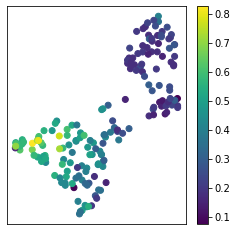

mean_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


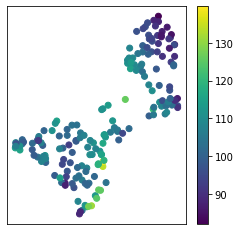

median_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


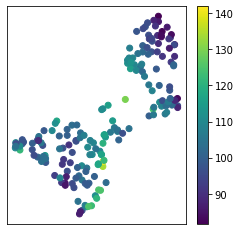

max_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


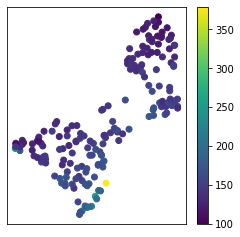

min_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


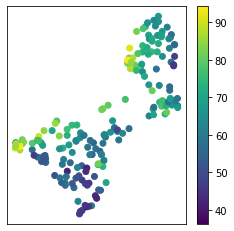

In [113]:
for i in cols:
    print(i)
    plot_UMAP_values(FN_combined[cols],FN_combined[i],random_state=42)
    plt.show()